In [78]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import zipfile
from pathlib import Path
from PIL import Image

## Download CXR dataset from Kaggle

Source: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

In [1]:
!pip install kaggle

In [ ]:
# Upload the kaggle.json file from the Kaggle API
from google.colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [14]:
# Change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

In [15]:
!kaggle datasets download paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:30<00:00, 106MB/s] 
100% 2.29G/2.29G [00:30<00:00, 79.8MB/s]


## Retrieve and Visualise Data

In [22]:
data_dir = Path("data")

# Create a folder for the dataset
if data_dir.is_dir():
  print(f"{data_dir} folder already exists ... skipping download")
else:
  print(f"{data_dir} does not exist, creating one...")
  data_dir.mkdir(parents=True, exist_ok=True)

with zipfile.ZipFile("chest-xray-pneumonia.zip", "r") as zip_ref:
  print(f"Unzipping chest xray data...")
  zip_ref.extractall(data_dir)

data folder already exists ... skipping download
Unzipping chest xray data...


In [39]:
for dirpath, dirnames, filenames in os.walk(data_dir):
  print(f"Images: {len(filenames)} | Path: {dirpath}")

Images: 0 | Path: data
Images: 0 | Path: data/chest_xray
Images: 0 | Path: data/chest_xray/test
Images: 234 | Path: data/chest_xray/test/NORMAL
Images: 390 | Path: data/chest_xray/test/PNEUMONIA
Images: 0 | Path: data/chest_xray/val
Images: 8 | Path: data/chest_xray/val/NORMAL
Images: 8 | Path: data/chest_xray/val/PNEUMONIA
Images: 0 | Path: data/chest_xray/train
Images: 1341 | Path: data/chest_xray/train/NORMAL
Images: 3875 | Path: data/chest_xray/train/PNEUMONIA


In [ ]:
# Remove the extra directories
!rm -r /content/data/chest_xray/__MACOSX
!rm -r /content/data/chest_xray/chest_xray

In [40]:
train_dir = data_dir/ "chest_xray/train"
test_dir = data_dir/ "chest_xray/test"

train_dir, test_dir

(PosixPath('data/chest_xray/train'), PosixPath('data/chest_xray/test'))

Image Path: data/chest_xray/train/PNEUMONIA/person337_bacteria_1564.jpeg
Image Class: PNEUMONIA | Width: 700 | Height: 500


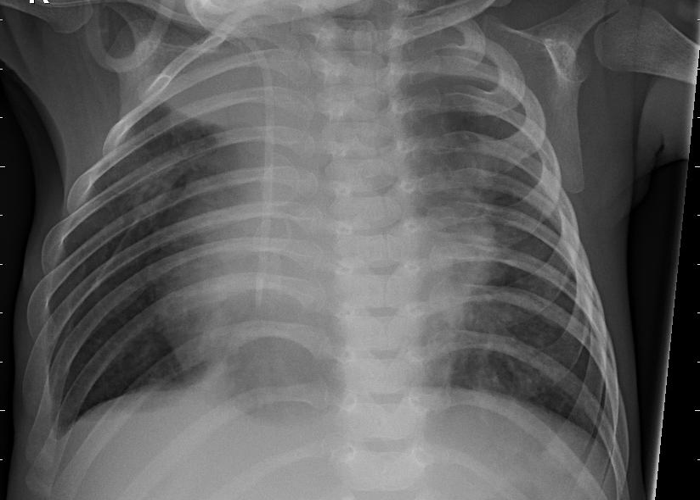

In [80]:
image_pth_lst = list(data_dir.glob("*/*/*/*.jpeg"))

rnd_image_pth = random.choice(image_pth_lst)

image_class = rnd_image_pth.parent.stem

img = Image.open(rnd_image_pth).resize((700, 500))

print(f"Image Path: {rnd_image_pth}")
print(f"Image Class: {image_class} | Width: {img.width} | Height: {img.height}")
img

(-0.5, 699.5, 499.5, -0.5)

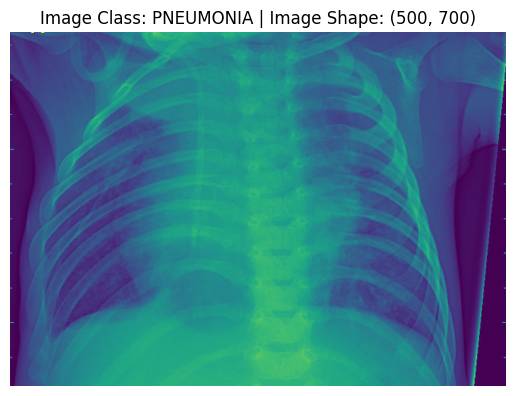

In [86]:
img_as_array = np.asarray(img)

plt.imshow(img_as_array)
plt.title(f"Image Class: {image_class} | Image Shape: {img_as_array.shape}")
plt.axis(False)